In [1]:
import numpy as np
import pandas as pd

from scipy.stats import binom

from plotnine import *

In [2]:
q = .9
n = 25
percentage_pos = .5

th = np.arange(n) / n
pos = int(n * percentage_pos)
p_pos = (n * (1 - th)).astype(np.int32)

# true positive quantiles
upper = binom(n=p_pos, p=percentage_pos).ppf(q)
lower = binom(n=p_pos, p=percentage_pos).ppf(1 - q)

prec = np.concatenate((upper / p_pos, lower / p_pos))
rec = np.concatenate((upper / pos, lower / pos))
th = np.tile(th, 2)

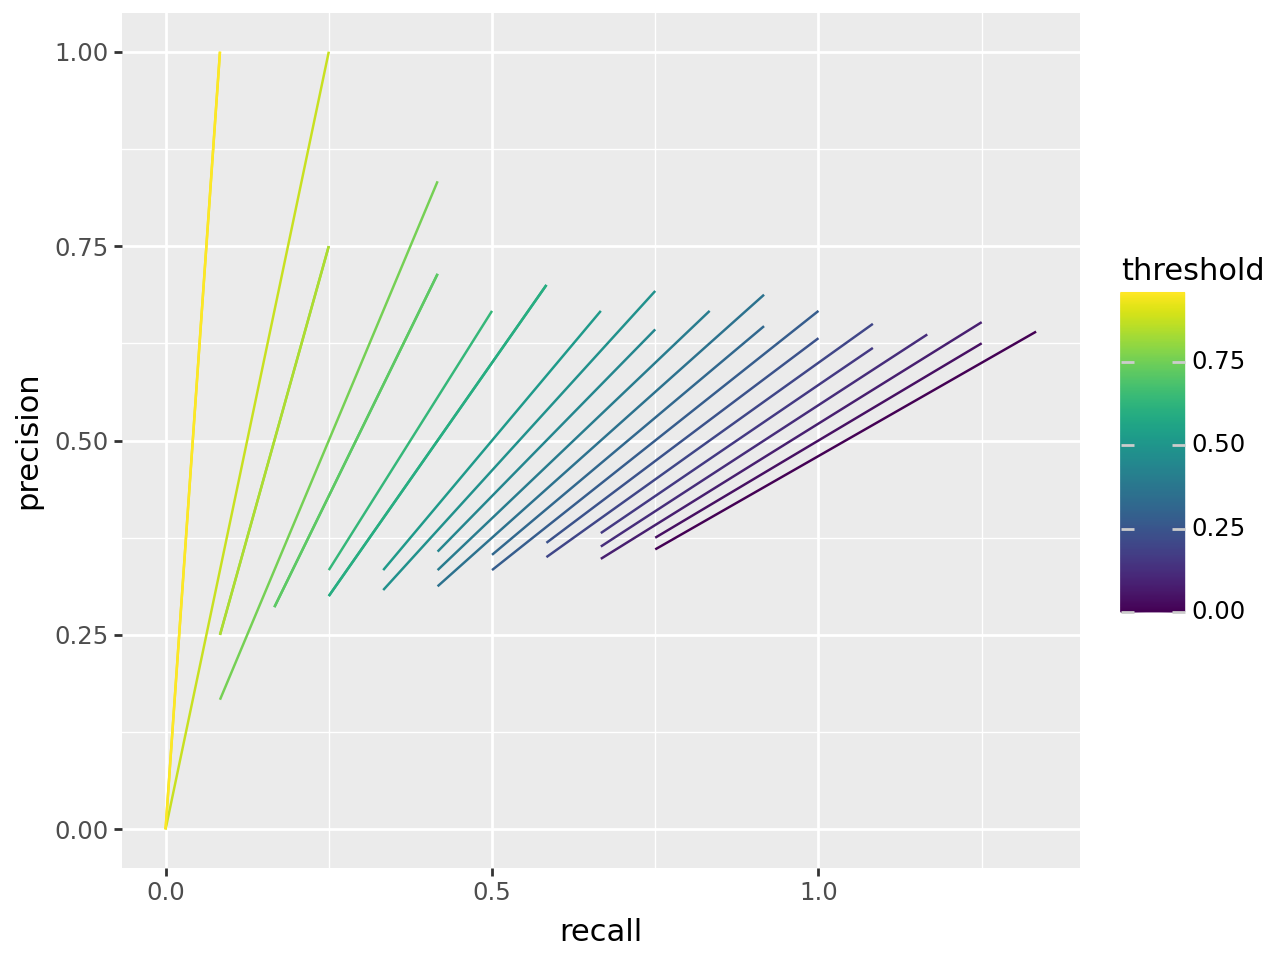

In [3]:
df = pd.DataFrame({'precision': prec, 'recall': rec, 'threshold': th})
g = ggplot(df) + aes('recall', 'precision', color='threshold', group='threshold') + geom_line()
g